IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER PRENDERE I FILE CSV PER LA CREAZIONE DEL DATAFRAME FINALE

In [2]:
path_file = os.path.abspath(os.getcwd()) #prendiamo il path in cui si trova il file su cui stiamo lavorando
print(path_file)
os.chdir(path_file) #cambiamo directory al fine di poter prendere i file csv per la creazione del dataframe

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


DATAFRAME CHE CONTERRA' I DATI DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi con estensione csv nella cartella path_file
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
df_1 = pd.DataFrame() #creazione di un dataframe vuoto

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    df_1 = df_1.append(df,ignore_index=True)

RIMOZIONE DI EVENTUALI DUPLICATI

In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

SHUFFLING DEL DATAFRAME

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      40.0 -0.062526   0.011410    0.357050   0.123652          0.0   
1      31.0 -0.137997   0.041601   -1.542529   0.246040         69.0   
2      59.0 -0.044616   0.009069    0.713495   0.105061          0.0   
3      46.0 -0.122084   0.038022   -0.357290   0.229848         77.0   
4      54.0 -0.140723   0.039535   -1.467760   0.243393         97.0   
...     ...       ...        ...         ...        ...          ...   
1344   28.0 -0.136914   0.032916   -0.751459   0.227100          0.0   
1345   16.0  0.025100   0.048039    3.097687   0.220313         65.0   
1346   43.0 -0.042699   0.017952   -0.732960   0.140461         91.0   
1347   67.0 -0.064601   0.010851    0.503982   0.122470          0.0   
1348   45.0  0.012290   0.049501    2.719263   0.222547         76.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            84.0   12.499887    5.413690  0.013004  ...  1537

RIMOZIONE DELLA COLONNA RELATIVA AL TEMPO

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.062526   0.011410    0.357050   0.123652          0.0         84.0   
1    -0.137997   0.041601   -1.542529   0.246040         69.0         87.0   
2    -0.044616   0.009069    0.713495   0.105061          0.0        106.0   
3    -0.122084   0.038022   -0.357290   0.229848         77.0         58.0   
4    -0.140723   0.039535   -1.467760   0.243393         97.0         96.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.136914   0.032916   -0.751459   0.227100          0.0        110.0   
1345  0.025100   0.048039    3.097687   0.220313         65.0         64.0   
1346 -0.042699   0.017952   -0.732960   0.140461         91.0         89.0   
1347 -0.064601   0.010851    0.503982   0.122470          0.0         76.0   
1348  0.012290   0.049501    2.719263   0.222547         76.0         75.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset mediante oversampling

In [7]:
guasto_10 = df_1[df_1['Guasto'] == 2]
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  390 Guasto 5%:  418 Guasto 10%:  541


In [8]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [9]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.062526   0.011410    0.357050   0.123652     0.000000    84.000000   
1    -0.137997   0.041601   -1.542529   0.246040    69.000000    87.000000   
2    -0.044616   0.009069    0.713495   0.105061     0.000000   106.000000   
3    -0.122084   0.038022   -0.357290   0.229848    77.000000    58.000000   
4    -0.140723   0.039535   -1.467760   0.243393    97.000000    96.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.023971   0.009746    2.429702   0.101465    77.532833    58.532833   
1619  0.000940   0.011101    3.148039   0.105224    59.000000    76.476452   
1620 -0.112982   0.040024   -0.461350   0.229519    55.560157    78.373438   
1621 -0.140907   0.040157   -1.490762   0.244767    90.596834    89.596834   
1622 -0.028131   0.007507   -0.615284   0.090992   101.596821    74.758093   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp1(

In [10]:
guasto_10 = y[y['Guasto'] == 2]
no_guasto = y[y['Guasto'] == 0]
guasto_5 = y[y['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  541 Guasto 5%:  541 Guasto 10%:  541


# Selezione feature più importanti (mediante ANOVA)

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_classif, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15)
[False False False False False False False False  True  True False  True
  True False  True False False False False  True False False False False
  True False False False  True False  True  True  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


SCORE DELLE FEATURES

In [12]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

   Input_Features     F_Score
28    freq1(AccX)  831.085873
12    freq1(GyrY)  815.263597
34     kurt(AccY)  801.937919
32       <>(AccY)  679.354322
30     amp1(AccX)  658.497845
24       <>(AccX)  650.548489
78       amp1(C9)  623.129155
35      RMS(AccY)  614.737805
8        <>(GyrY)  589.922402
31     amp2(AccX)  551.266069
9       var(GyrY)  478.979525
79       amp2(C9)  478.889826
19      RMS(GyrZ)  475.929307
11      RMS(GyrY)  461.204333
14     amp1(GyrY)  445.692327


In [13]:
#creazione di una lista in cui andiamo a mettere le feature che non sono state selezionate dal metodo ANOVA
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


RIMOZIONE DELLE FEATURE NON SELEZIONATE

In [14]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  RMS(GyrZ)  \
0     0.013004   0.006325   0.080487   110.000000    3.058449   0.122008   
1     0.028043   0.009093   0.099275    89.000000    5.772876   0.153664   
2     0.054559   0.004895   0.088658   116.000000    2.844382   0.120702   
3     0.039791   0.010344   0.109094    99.000000    3.648491   0.125698   
4     0.026199   0.008739   0.096976   107.000000    2.769507   0.149789   
...        ...        ...        ...          ...         ...        ...   
1618 -0.008226   0.006309   0.079747   109.766417    5.359744   0.111599   
1619  0.066223   0.011527   0.126018    66.480676    1.718683   0.112685   
1620  0.047203   0.010497   0.112676    97.186719    6.624517   0.130774   
1621  0.027111   0.008797   0.097520    99.355680    2.285258   0.150849   
1622  0.048574   0.012523   0.121864   121.379046   20.042915   0.148297   

      <>(AccX)  freq1(AccX)  amp1(AccX)  amp2(AccX)  <>(AccY)  kurt(AccY)  \
0    -0.21

### Separazione del dataset in training e test

In [15]:
# Random state
rs = 42

# split del dataset in training (80%) e test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# dimensioni degli insiemi di training e test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 15)
(325, 15)
(1298, 1)
(325, 1)


DEFINIZIONE DEI CLASSIFICATORI CHE VERRANNO POI UTILIZZATI PER CLASSIFICARE I DATI

In [16]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy",max_depth=1),
    RandomForestClassifier(n_estimators = 1000,max_depth=1, random_state=rs,bootstrap=False),
    SVC(probability=True), #Support Vector Machine
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

clf_name = [] # nomi dei classificatori
model_results = pd.DataFrame.copy(y_test) #risultato della predizione dal modello

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores della cross-validation
cv_acc = [] # accuratezza media della cross-validation, da massimizzare
cv_std = [] # deviazione standard della cross-validation, ma minimizzare

cnfm = [] #matrici di confusione
clr = [] #report della classificazione

### CLASSIFICAZIONE

Cross-Validation: [0.80769231 0.79615385 0.83076923 0.7992278  0.78764479]
Accuracy: 0.81 	 ---> LogisticRegression 


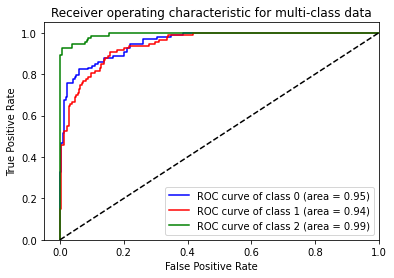

----------------------------------------------------
Cross-Validation: [0.66153846 0.65       0.65384615 0.65637066 0.65250965]
Accuracy: 0.66 	 ---> DecisionTreeClassifier 


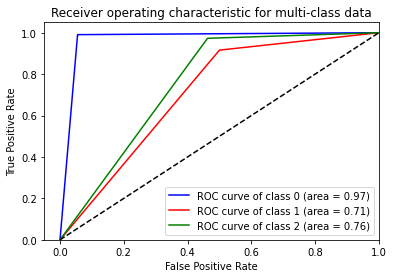

----------------------------------------------------
Cross-Validation: [0.93846154 0.95769231 0.96538462 0.95752896 0.93436293]
Accuracy: 0.95 	 ---> RandomForestClassifier 


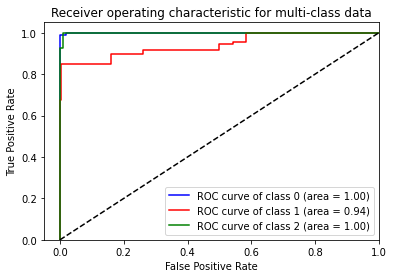

----------------------------------------------------
Cross-Validation: [0.67307692 0.68461538 0.62307692 0.63320463 0.69498069]
Accuracy: 0.64 	 ---> SVC 


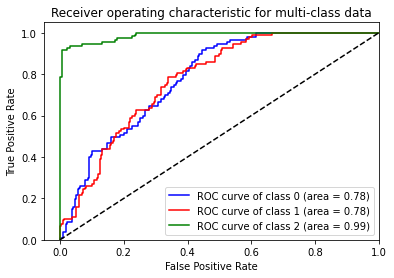

----------------------------------------------------
Cross-Validation: [0.79230769 0.89615385 0.83076923 0.7953668  0.87258687]
Accuracy: 0.85 	 ---> MLPClassifier 


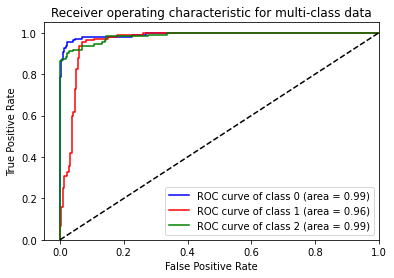

----------------------------------------------------
Cross-Validation: [0.64230769 0.60769231 0.62307692 0.63320463 0.71814672]
Accuracy: 0.67 	 ---> SGDClassifier 


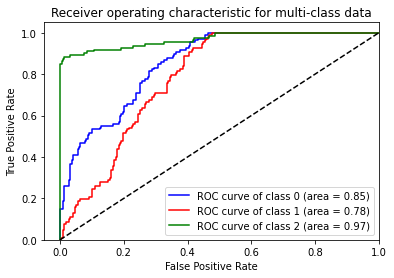

----------------------------------------------------


In [17]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3 # numero di classi in cui andremo a classificare

j=0
# training degli algoritmi e risultati
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting del modello e predizione
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))

    # procedimento per la costruzione della curva ROC a tre classi
    if (j == 1) | (j == 2) | (j == 4):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### MATRICI DI CONFUSIONE

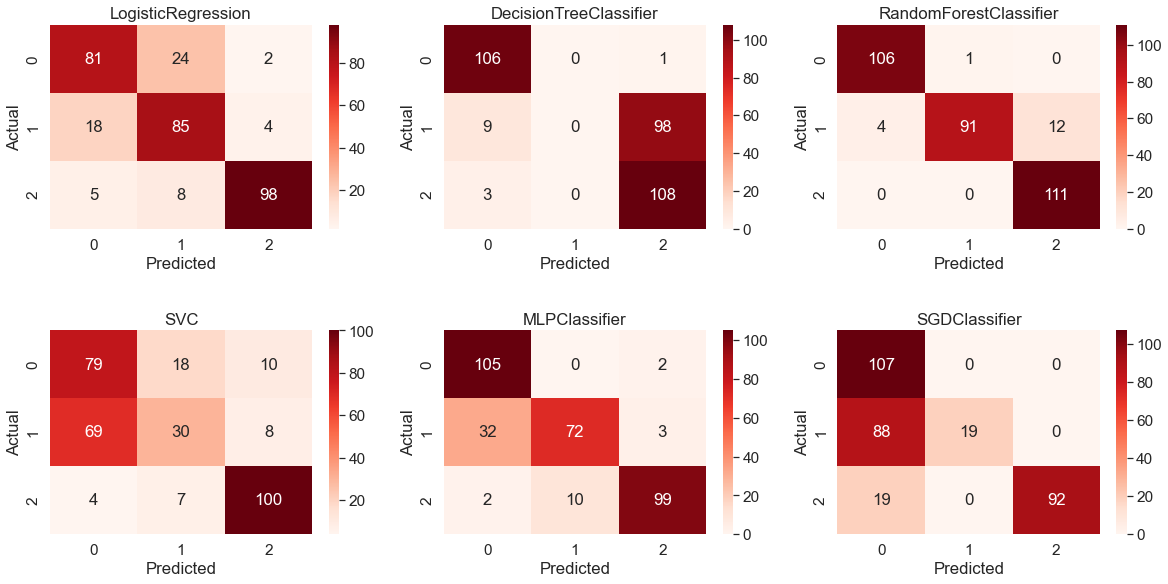

In [18]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1)
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

CROSS VALIDATION SCORES

Text(0.5, 1.0, 'Cross validation scores')

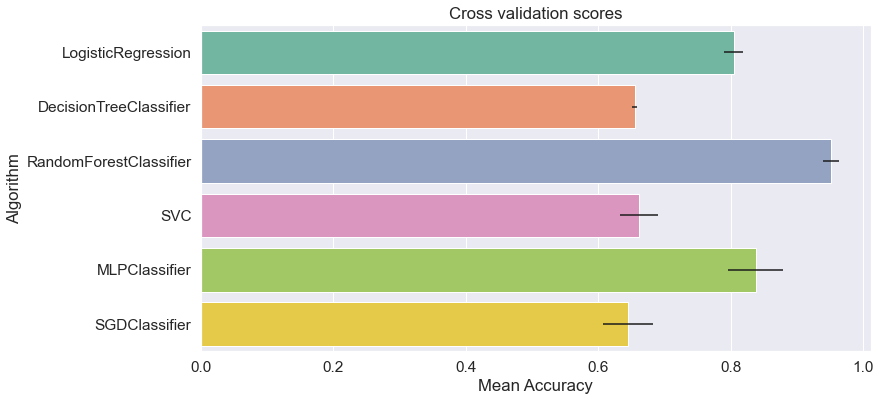

In [19]:
# Grafico per l'analisi dell'accuratezza media ed errore risultante dalla cross-validation
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

### REPORT CLASSIFICAZIONE

In [20]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       107
           1       0.73      0.79      0.76       107
           2       0.94      0.88      0.91       111

    accuracy                           0.81       325
   macro avg       0.82      0.81      0.81       325
weighted avg       0.82      0.81      0.81       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       107
           1       0.00      0.00      0.00       107
           2       0.52      0.97      0.68       111

    accuracy                           0.66       325
   macro avg       0.47      0.65      0.54       325
weighted avg       0.47      0.66      0.54       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      